In [30]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

- CUSTID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASHADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Numbe of purchase transactions made
- CREDITLIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [31]:
df = pd.read_csv('../data/creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Now let's see the correlation matrix.

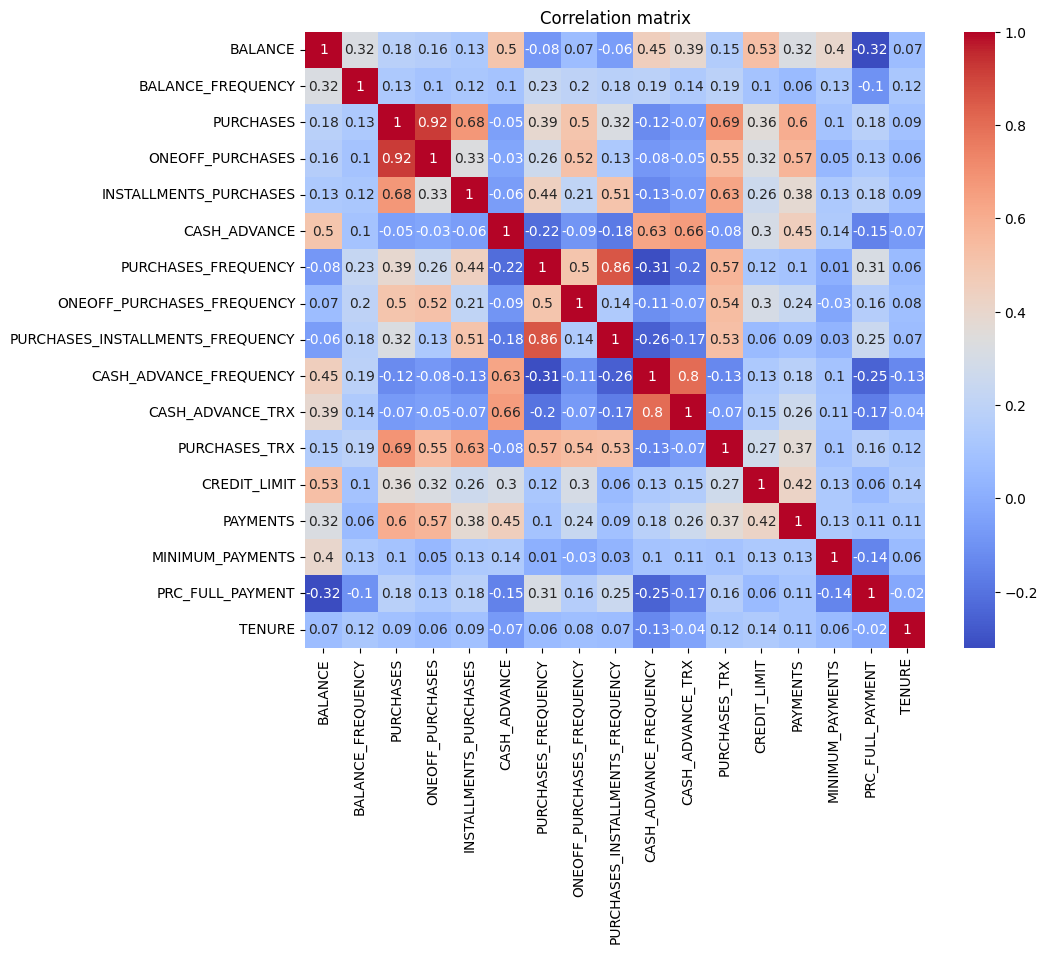

In [36]:
df_corr = df.corr().round(2)
plt.figure(figsize=(10,8))
plt.title('Correlation matrix')
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_2491/1895583234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df['ONEOFF_PURCHASES_FREQUENCY'] > df['PURCHASES_INSTALLMENTS_FREQUENCY']
/tmp/ipykernel_2491/1895583234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df['Group'].replace(True, 'Oneoff').replace(False, 'Installements')


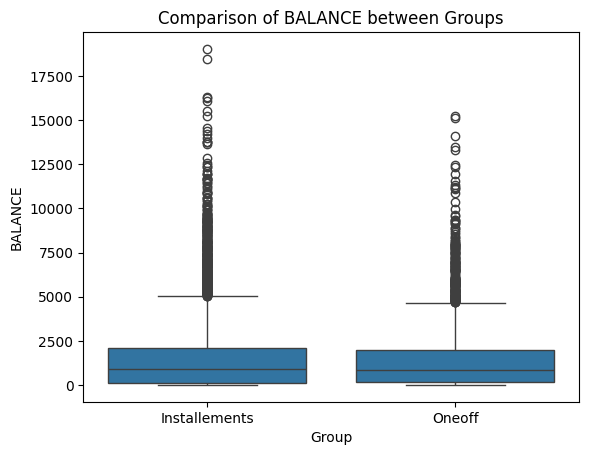

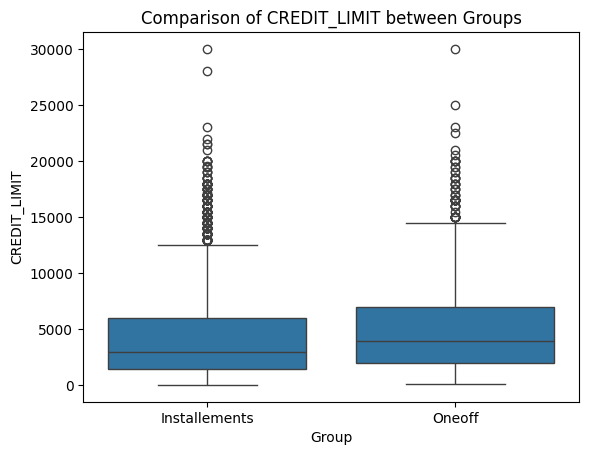

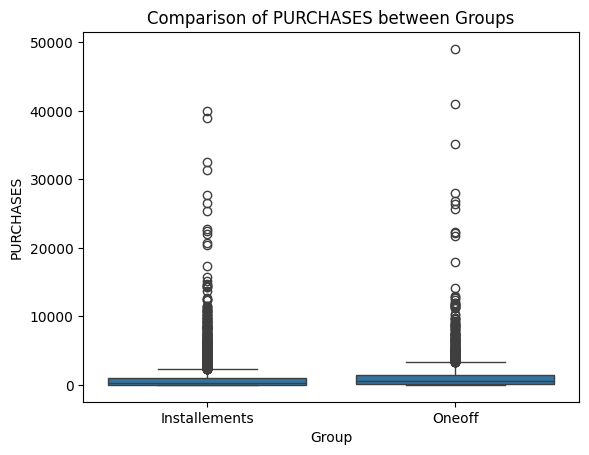

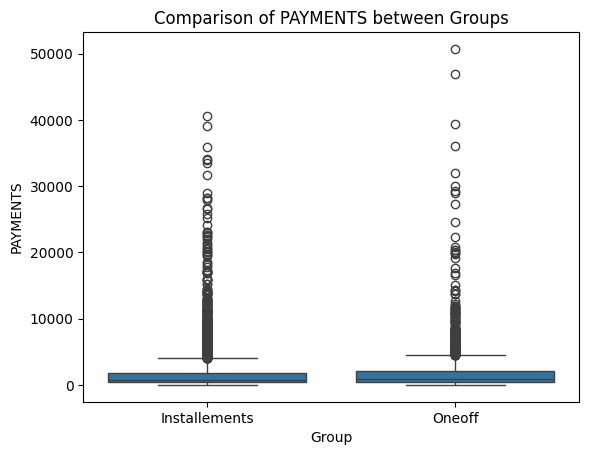

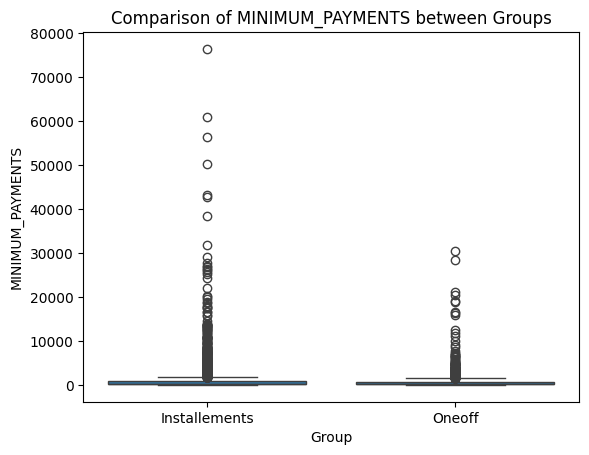

In [37]:
df['Group'] = df['ONEOFF_PURCHASES_FREQUENCY'] > df['PURCHASES_INSTALLMENTS_FREQUENCY'] 
df['Group'] = df['Group'].replace(True, 'Oneoff').replace(False, 'Installements')

features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for feature in features:
    sns.boxplot(x='Group', y=feature, data=df)
    plt.title(f'Comparison of {feature} between Groups')
    plt.show()

We can see that people who prefere oneoff payments have larger credit limit. Meanwhile there is much more people with high minimum payment amount among installements group.
Let's drop our column and proceed to clustering.

In [38]:
df = df.drop(columns=['Group'])

# Clustering


First step is data preprocessing. Firstly we'll handle categorical column CUSTID. It is not relevant for our clustering, so we can drop it.

In [ ]:
df = df.iloc[:, 1:]
df

We also should check if our dataset contains NaN values.

In [ ]:
df.isna().sum().sort_values(ascending=False)

We can drop one row with no credit limit and replace all NaNs in MINIMUM_PAYMENTS with median value.

In [ ]:
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median())
df = df.dropna()



In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30548157,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08773463,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09986968,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32954733,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34078648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3270727 ,
        -0.52555097, -4.12276757]])

We will try to analyse the differences in behaviour between people who prefer one-go payments and installments. 

Let's do the K-Means clustering to divide our groups.

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', hue='Cluster', palette='Set1', s=100)
plt.title('')
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values